## Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations 
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better  understanding of the variable, to convert a non-linear relation into a linear one, or to  decrease the skewness and convert the distribution into a normal distribution. 

Reason and document your approach properly

-- **Tejas Chakkarwar TECO-A06**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('AcademicPerformance.csv')

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Year_Birth,math score,reading score,writing score,Dt_Admission,College_Fees
0,female,group B,bachelor's degree,standard,none,1970.0,72.0,72,74,6/16/14,"$84,835.00"
1,female,group C,some college,standard,completed,1961.0,NaN,na,A,6/15/14,"$57,091.00"
2,female,group B,master's degree,standard,none,1958.0,90.0,95,93,5/13/14,"$67,267.00"
3,male,group A,associate's degree,free/reduced,none,1967.0,NaN,NaN,44,05-11-2014,"$32,474.00"
4,male,group C,some college,standard,none,1989.0,76.0,78,75,04-08-2014,"$21,474.00"
...,...,...,...,...,...,...,...,...,...,...,...
2235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

gender                         1240
race/ethnicity                 1240
parental level of education    1240
lunch                          1240
test preparation course        1240
Year_Birth                     1240
math score                     1242
reading score                  1241
writing score                  1240
Dt_Admission                   1240
College_Fees                   1245
dtype: int64

In [8]:
df.isnull().sum()

gender                         1240
race/ethnicity                 1240
parental level of education    1240
lunch                          1240
test preparation course        1240
Year_Birth                     1240
math score                     1242
reading score                  1241
writing score                  1240
Dt_Admission                   1240
College_Fees                   1245
dtype: int64

In [9]:
missing_values = ["n/a", "na", "--"]

In [10]:
df = pd.read_csv('AcademicPerformance.csv', na_values=missing_values)

In [11]:
df.isna().sum()

gender                         1240
race/ethnicity                 1240
parental level of education    1240
lunch                          1240
test preparation course        1240
Year_Birth                     1240
math score                     1242
reading score                  1242
writing score                  1240
Dt_Admission                   1240
College_Fees                   1245
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   Year_Birth                   1000 non-null   float64
 6   math score                   998 non-null    float64
 7   reading score                998 non-null    float64
 8   writing score                1000 non-null   object 
 9   Dt_Admission                 1000 non-null   object 
 10  College_Fees                 995 non-null    object 
dtypes: float64(3), object(8)
memory usage: 192.6+ KB


In [13]:
df.size

24640

In [14]:
df.shape

(2240, 11)

In [15]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Year_Birth,math score,reading score,writing score,Dt_Admission,College_Fees
0,female,group B,bachelor's degree,standard,none,1970.0,72.0,72.0,74,6/16/14,"$84,835.00"
1,female,group C,some college,standard,completed,1961.0,NaN,NaN,A,6/15/14,"$57,091.00"
2,female,group B,master's degree,standard,none,1958.0,90.0,95.0,93,5/13/14,"$67,267.00"
3,male,group A,associate's degree,free/reduced,none,1967.0,NaN,NaN,44,05-11-2014,"$32,474.00"
4,male,group C,some college,standard,none,1989.0,76.0,78.0,75,04-08-2014,"$21,474.00"
5,female,group B,associate's degree,standard,none,1958.0,71.0,83.0,78,3/17/14,"$71,691.00"
6,female,group B,some college,standard,completed,1954.0,88.0,95.0,92,1/29/14,"$63,564.00"
7,male,group B,some college,free/reduced,none,1967.0,40.0,43.0,39,1/18/14,"$44,931.00"
8,male,group D,high school,free/reduced,completed,1954.0,64.0,64.0,67,01-11-2014,"$65,324.00"
9,female,group B,high school,free/reduced,none,1954.0,38.0,60.0,50,01-11-2014,"$65,324.00"


In [16]:
from datetime import date
df['age'] = date.today().year - df['Year_Birth']

In [17]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Year_Birth,math score,reading score,writing score,Dt_Admission,College_Fees,age
0,female,group B,bachelor's degree,standard,none,1970.0,72.0,72.0,74,6/16/14,"$84,835.00",52.0
1,female,group C,some college,standard,completed,1961.0,NaN,NaN,A,6/15/14,"$57,091.00",61.0
2,female,group B,master's degree,standard,none,1958.0,90.0,95.0,93,5/13/14,"$67,267.00",64.0
3,male,group A,associate's degree,free/reduced,none,1967.0,NaN,NaN,44,05-11-2014,"$32,474.00",55.0
4,male,group C,some college,standard,none,1989.0,76.0,78.0,75,04-08-2014,"$21,474.00",33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.drop(['Year_Birth'], axis=1, inplace = True)

In [22]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Dt_Admission,College_Fees,age
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,6/16/14,"$84,835.00",52.0
1,female,group C,some college,standard,completed,NaN,NaN,A,6/15/14,"$57,091.00",61.0
2,female,group B,master's degree,standard,none,90.0,95.0,93,5/13/14,"$67,267.00",64.0
3,male,group A,associate's degree,free/reduced,none,NaN,NaN,44,05-11-2014,"$32,474.00",55.0
4,male,group C,some college,standard,none,76.0,78.0,75,04-08-2014,"$21,474.00",33.0
...,...,...,...,...,...,...,...,...,...,...,...
2235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_lunch = pd.get_dummies(df['lunch'])
df = pd.concat([df, df_lunch], axis = 1)

In [25]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Dt_Admission,College_Fees,age,free/reduced,standard
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,6/16/14,"$84,835.00",52.0,0,1
1,female,group C,some college,standard,completed,NaN,NaN,A,6/15/14,"$57,091.00",61.0,0,1
2,female,group B,master's degree,standard,none,90.0,95.0,93,5/13/14,"$67,267.00",64.0,0,1
3,male,group A,associate's degree,free/reduced,none,NaN,NaN,44,05-11-2014,"$32,474.00",55.0,1,0
4,male,group C,some college,standard,none,76.0,78.0,75,04-08-2014,"$21,474.00",33.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [26]:
df['$Fees'] = df['College_Fees'].str.replace(',', '').str.replace('$', '').str.replace('.', '').fillna(0).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [33]:
df['FeesInMillions'] = df['$Fees']/1000000
df['FeesInApproxMillions'] = df['FeesInMillions'].astype(int)

In [34]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Dt_Admission,College_Fees,age,free/reduced,standard,$Fees,FeesInMillions,FeesInApproxMillions
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,6/16/14,"$84,835.00",52.0,0,1,8483500,8.4835,8
1,female,group C,some college,standard,completed,NaN,NaN,A,6/15/14,"$57,091.00",61.0,0,1,5709100,5.7091,5
2,female,group B,master's degree,standard,none,90.0,95.0,93,5/13/14,"$67,267.00",64.0,0,1,6726700,6.7267,6
3,male,group A,associate's degree,free/reduced,none,NaN,NaN,44,05-11-2014,"$32,474.00",55.0,1,0,3247400,3.2474,3
4,male,group C,some college,standard,none,76.0,78.0,75,04-08-2014,"$21,474.00",33.0,0,1,2147400,2.1474,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0000,0
2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0000,0
2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0000,0
2238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0000,0


In [36]:
df['reading score'].fillna(0).astype(int)

0       72
1        0
2       95
3        0
4       78
        ..
2235     0
2236     0
2237     0
2238     0
2239     0
Name: reading score, Length: 2240, dtype: int64

In [54]:
array = df['reading score'].values

{'boxes': [<matplotlib.lines.Line2D at 0x7f801e53fe90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f801e4f9410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f801e500450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f801e4f9c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f801e4f3950>,
  <matplotlib.lines.Line2D at 0x7f801e4f3e90>]}

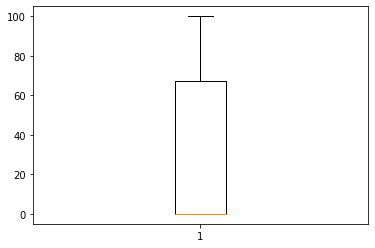

In [112]:
plt.boxplot(array)

In [96]:
np.nan_to_num(array, 0)

array([72.,  0., 95., ...,  0.,  0.,  0.])

In [97]:
sorted = np.sort(array)

In [98]:
sorted

array([  0.,   0.,   0., ..., 100., 100., 100.])

In [99]:
q1, q3 = np.percentile(sorted, [25, 75])

In [100]:
iqr = q3 - q1

In [101]:
lowerBound = q1 - 1.5*iqr

In [102]:
upperBound = q3 + 1.5*iqr

In [103]:
print(q1, q3, iqr)

0.0 67.0 67.0


In [104]:
print(lowerBound, upperBound)

-100.5 167.5


In [105]:
sorted.mean()

30.81339285714286

In [106]:
df['reading score'].value_counts()

0.0     1242
72.0      34
74.0      33
64.0      32
73.0      30
        ... 
28.0       1
26.0       1
17.0       1
32.0       1
40.0       1
Name: reading score, Length: 73, dtype: int64

In [113]:
outlier = 0
for i in range(len(sorted)): 
    if (sorted[i] < lowerBound or sorted[i] > upperBound):
       outlier +=1
       sorted[i] = 0

In [114]:
outlier

0

In [115]:
sorted.mean()

30.81339285714286